## DOCTOR'S CONSULTATION FEES
* Qualification: Qualification and degrees held by the doctor - String
* Experience: Experience of the doctor in number of years - Integer Continuous
* Rating: Rating given by patients - Integer - Continuous
* Profile: Type of the doctor - String
* Miscellaeous_Info: Extra information about the doctor - String
* Fees: Fees charged by the doctor - Integer - Continuous
* Place: Area and the city where the doctor is located - String

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)

In [3]:
df_train = pd.read_excel("D:/STUDIES/DATA TRAINED/DATASETS/EVALUATION_WEEK_3/Final Participant Data Folder/Final_Train.xlsx")
df_test = pd.read_excel("D:/STUDIES/DATA TRAINED/DATASETS/EVALUATION_WEEK_3/Final Participant Data Folder/Final_Test.xlsx")
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


* Columns Rating, Experience need to be converted to be integers

In [6]:
df_train.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


* Fees varies from Rs.5 to Rs.950.

In [7]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [8]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

* We can't fill the unknown of any of the columns that have missing values
* Ratings can't be filled with mean based on any category since each doctor is different
* Similarly Place also can't be filled randomly
* We have to group them into separate categories

### FEATURE ENGINEERING

#### Converting Experience and Rating columns to Integer and Float repectively

In [9]:
df_train['Rating'] = df_train['Rating'].str.rstrip('%')
df_train['Rating'] = df_train['Rating'].astype('float')

df_test['Rating'] = df_test['Rating'].str.rstrip('%')
df_test['Rating'] = df_test['Rating'].astype('float')

In [10]:
df_train['Experience'] = df_train['Experience'].str.split().str[0]
df_train['Experience'] = df_train['Experience'].astype('int64')

df_test['Experience'] = df_test['Experience'].str.split().str[0]
df_test['Experience'] = df_test['Experience'].astype('int64')

In [11]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [12]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


#### The Qualification column can be split into multiple columns based on their Degrees

In [13]:
d ={}
for i in df_train["Qualification"].values:
    i = i.split(",")
    for j in i:
        j = j.strip()
        if j in d:
            d[j]+=1
        else:
            d[j]=1

In [14]:
sorted_keys = sorted(d, key=d.get, reverse= True)
top_20qual = sorted_keys[:20]
top_20qual

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy',
 'DDVL',
 'MD - Ayurveda Medicine',
 'DDV',
 'DNB - ENT',
 'MDS - Conservative Dentistry & Endodontics',
 'MDS - Oral & Maxillofacial Surgery',
 'MS - Otorhinolaryngology',
 'DNB - Dermatology & Venereology',
 'MDS',
 'MDS - Prosthodontics']

In [15]:
top_20qual_val = []
for i in top_20qual:
    top_20qual_val.append(d[i])
top_20qual_val

[2808,
 1363,
 764,
 749,
 606,
 411,
 297,
 285,
 250,
 181,
 161,
 139,
 129,
 111,
 107,
 104,
 103,
 88,
 82,
 74]

In [16]:
for i in top_20qual:
    df_train[i]=0
    df_test[i]=0
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5958,MBBS,41,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5959,"MBBS, MD - General Medicine",15,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
def present(q,i):
    if i in q:
        return 1
    else:
        return 0

In [18]:
for i in top_20qual:
    df_train[i] = df_train.apply(lambda row:present(row.Qualification,i), axis = 1)
    df_test[i] = df_test.apply(lambda row:present(row.Qualification,i), axis = 1)
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5958,MBBS,41,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5959,"MBBS, MD - General Medicine",15,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,"MBBS, DDVL",40,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,BDS,12,98.0,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###### We can drop the Qualification column

In [20]:
df_train.drop('Qualification',axis=1,inplace=True)
df_test.drop('Qualification',axis=1,inplace=True)

#### We can extract just the Cities from Place column

##### Before splitting the column we can fill the null values with value as NA

In [21]:
df_train.Place.fillna('NA,NA',inplace=True)
df_train.isnull().sum()

Experience                               0
Rating                                3302
Place                                    0
Profile                                  0
Miscellaneous_Info                    2620
                                      ... 
MDS - Oral & Maxillofacial Surgery       0
MS - Otorhinolaryngology                 0
DNB - Dermatology & Venereology          0
MDS                                      0
MDS - Prosthodontics                     0
Length: 26, dtype: int64

In [22]:
df_test.Place.fillna('NA,NA',inplace=True)
df_test.isnull().sum()

Experience                               0
Rating                                1090
Place                                    0
Profile                                  0
Miscellaneous_Info                     834
                                      ... 
MDS - Oral & Maxillofacial Surgery       0
MS - Otorhinolaryngology                 0
DNB - Dermatology & Venereology          0
MDS                                      0
MDS - Prosthodontics                     0
Length: 25, dtype: int64

In [23]:
df_train['City'] = df_train['Place'].str.split(",").str[-1]
df_train.head(10)

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City
0,24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Ernakulam
1,12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bangalore
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore
4,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai
5,8,NaN,"Porur, Chennai",Ayurveda,NaN,100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai
6,42,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi
7,10,99.0,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore
8,14,NaN,"Old City, Hyderabad",General Medicine,NaN,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Hyderabad
9,23,NaN,"Athani, Ernakulam",Dentist,NaN,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ernakulam


In [24]:
df_test['City'] = df_test['Place'].str.split(",").str[-1]
df_test.head(10)

,Experience,Rating,Place,Profile,Miscellaneous_Info,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City
0,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai
1,31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Hyderabad
2,40,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,Chennai
3,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi
4,16,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bangalore
5,14,90.0,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Chennai
6,23,94.0,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Bangalore
7,9,94.0,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Hyderabad
8,11,99.0,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore",0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore
9,44,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi


In [25]:
df_train['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
NA                       25
e                         1
Name: City, dtype: int64

In [26]:
df_test['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
NA                       6
Name: City, dtype: int64

In [27]:
df_train[df_train['City']=='e']

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City
3980,23,NaN,e,Dentist,NaN,250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,e


In [28]:
df_train.loc[3980,'City']='NA'
df_train.loc[3980,:]

Experience                              23
Rating                                 NaN
Place                                    e
Profile                            Dentist
Miscellaneous_Info                     NaN
                                    ...   
MS - Otorhinolaryngology                 0
DNB - Dermatology & Venereology          0
MDS                                      0
MDS - Prosthodontics                     0
City                                    NA
Name: 3980, Length: 27, dtype: object

##### We can drop the Place column

In [29]:
df_train.drop(('Place'),axis=1,inplace=True)
df_train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City
0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Ernakulam
1,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore
2,9,NaN,ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bangalore
3,12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore
4,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai


In [30]:
df_test.drop(('Place'),axis=1,inplace=True)
df_test.head()

,Experience,Rating,Profile,Miscellaneous_Info,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City
0,35,NaN,General Medicine,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai
1,31,NaN,ENT Specialist,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Hyderabad
2,40,70.0,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,Chennai
3,0,NaN,Ayurveda,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi
4,16,100.0,Dentist,General Dentistry Conservative Dentistry Cosme...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bangalore


##### We can try to create a new column - No. of feedbacks - from Miscellaneous_Info

In [31]:
res = list(df_train['Miscellaneous_Info'])
fb = {}
for i in range(len(res)):
    if type(res[i])!= float and 'feedback' in res[i].lower():
        fb[i] = res[i].split(' ')
fb

{0: ['100%', '16', 'Feedback', 'Kakkanad,', 'Ernakulam'],
 1: ['98%', '76', 'Feedback', 'Whitefield,', 'Bangalore'],
 4: ['100%', '4', 'Feedback', 'Keelkattalai,', 'Chennai'],
 12: ['98%', '14', 'Feedback', 'Coimbatore', 'Racecourse,', 'Coimbatore'],
 18: ['79%', '8', 'Feedback', 'KPHB,', 'Hyderabad'],
 19: ['100%', '4', 'Feedback', 'HSR', 'Layout,', 'Bangalore'],
 20: ['100%', '7', 'Feedback', 'Pollachi,', 'Coimbatore'],
 26: ['100%', '46', 'Feedback', 'HSR', 'Layout,', 'Bangalore'],
 27: ['95%', '6', 'Feedback', 'Kukatpally,', 'Hyderabad'],
 29: ['97%', '60', 'Feedback', 'Defence', 'Colony,', 'Delhi'],
 30: ['97%', '18', 'Feedback', 'Banjara', 'Hills,', 'Hyderabad'],
 33: ['88%', '2', 'Feedback', 'Mogappair', 'East,', 'Chennai'],
 37: ['90%', '2', 'Feedback', 'Borivali', 'West,', 'Mumbai'],
 38: ['80%', '3', 'Feedback', 'Saket,', 'Delhi'],
 41: ['100%', '21', 'Feedback', 'Dahisar', 'West,', 'Mumbai'],
 42: ['100%', '7', 'Feedback', 'RT', 'Nagar,', 'Bangalore'],
 48: ['93%', '42', 'Fe

In [32]:
res = list(df_test['Miscellaneous_Info'])
fb_test = {}
for i in range(len(res)):
    if type(res[i])!= float and 'feedback' in res[i].lower():
        fb_test[i] = res[i].split(' ')
fb_test

{2: ['70%', '4', 'Feedback', 'KK', 'Nagar,', 'Chennai'],
 6: ['94%', '6', 'Feedback', 'Frazer', 'Town,', 'Bangalore'],
 8: ['99%', '203', 'Feedback', 'Banashankari,', 'Bangalore'],
 12: ['98%', '28', 'Feedback', 'Kemps', 'Corner,', 'Mumbai'],
 16: ['87%', '9', 'Feedback', 'Tis', 'Hazari,', 'Delhi'],
 17: ['64%', '4', 'Feedback', 'Banashankari', '2nd', 'Stage,', 'Bangalore'],
 19: ['90%', '3', 'Feedback', 'Basavanagudi,', 'Bangalore'],
 23: ['100%', '10', 'Feedback', 'Begumpet,', 'Hyderabad'],
 32: ['95%', '7', 'Feedback', 'Vileparle', 'West,', 'Mumbai'],
 33: ['95%', '91', 'Feedback', 'Sakinaka,', 'Mumbai'],
 34: ['97%', '173', 'Feedback', 'Bannerghatta', 'Road,', 'Bangalore'],
 44: ['98%', '178', 'Feedback', 'Andheri', 'East,', 'Mumbai'],
 58: ['93%', '1', 'Feedback', 'Aluva,', 'Ernakulam'],
 60: ['94%', '31', 'Feedback', 'Whitefield,', 'Bangalore'],
 63: ['98%', '29', 'Feedback', 'Rajarajeshwarinagar,', 'Bangalore'],
 65: ['69%', '3', 'Feedback', 'Vikas', 'Nagar,', 'Delhi'],
 67: ['9

In [33]:
nfb = []
for i in fb:
    pos = fb[i].index('Feedback') - 1
    nfb.append(fb[i][pos])
nfb

['16',
 '76',
 '4',
 '14',
 '8',
 '4',
 '7',
 '46',
 '6',
 '60',
 '18',
 '2',
 '2',
 '3',
 '21',
 '7',
 '42',
 '7',
 '65',
 '3',
 '54',
 '1',
 '43',
 '24',
 '44',
 '3',
 '9',
 '47',
 '43',
 '7',
 '33',
 '51',
 '18',
 '23',
 '3',
 '30',
 '13',
 '84',
 '15',
 '18',
 '55',
 '9',
 '112',
 '2',
 '20',
 '15',
 '1',
 '9',
 '5',
 '17',
 '4',
 '3',
 '5',
 '3',
 '1',
 '67',
 '3',
 '48',
 '15',
 '11',
 '11',
 '4',
 '9',
 '4',
 '12',
 '1',
 '20',
 '48',
 '40',
 '17',
 '2',
 '39',
 '4',
 '13',
 '6',
 '15',
 '15',
 '1',
 '1',
 '6',
 '57',
 '68',
 '18',
 '2',
 '3',
 '60',
 '3',
 '51',
 '12',
 '175',
 '3',
 '4',
 '28',
 '3',
 '5',
 '24',
 '12',
 '4',
 '13',
 '34',
 '5',
 '29',
 '13',
 '17',
 '34',
 '13',
 '1',
 '9',
 '15',
 '20',
 '6',
 '19',
 '1',
 '4',
 '10',
 '46',
 '506',
 '11',
 '1',
 '62',
 '7',
 '13',
 '17',
 '38',
 '54',
 '116',
 '53',
 '2',
 '2',
 '28',
 '29',
 '12',
 '11',
 '8',
 '29',
 '99',
 '5',
 '2',
 '15',
 '65',
 '3',
 '29',
 '99',
 '566',
 '12',
 '31',
 '13',
 '72',
 '19',
 '21',
 '9'

In [34]:
nfb_test = []
for i in fb_test:
    pos = fb_test[i].index('Feedback') - 1
    nfb_test.append(fb_test[i][pos])
nfb_test

['4',
 '6',
 '203',
 '28',
 '9',
 '4',
 '3',
 '10',
 '7',
 '91',
 '173',
 '178',
 '1',
 '31',
 '29',
 '3',
 '13',
 '6',
 '2',
 '13',
 '1',
 '112',
 '3',
 '19',
 '1',
 '59',
 '9',
 '10',
 '34',
 '111',
 '1',
 '7',
 '158',
 '1',
 '6',
 '2',
 '11',
 '280',
 '41',
 '18',
 '10',
 '10',
 '87',
 '25',
 '1',
 '5',
 '9',
 '2',
 '17',
 '53',
 '34',
 '8',
 '2',
 '3',
 '50',
 '4',
 '170',
 '13',
 '8',
 '3',
 '7',
 '32',
 '1',
 '11',
 '7',
 '25',
 '143',
 '10',
 '60',
 '14',
 '7',
 '3',
 '21',
 '5',
 '62',
 '9',
 '3',
 '14',
 '12',
 '16',
 '1',
 '23',
 '293',
 '97',
 '2',
 '5',
 '2',
 '1',
 '76',
 '29',
 '10',
 '31',
 '10',
 '10',
 '6',
 '7',
 '4',
 '77',
 '1',
 '2',
 '3',
 '9',
 '17',
 '16',
 '13',
 '2',
 '5',
 '2',
 '188',
 '71',
 '23',
 '7',
 '2',
 '12',
 '11',
 '9',
 '5',
 '5',
 '20',
 '4',
 '2',
 '591',
 '7',
 '20',
 '14',
 '3',
 '7',
 '11',
 '42',
 '4',
 '3',
 '13',
 '25',
 '10',
 '7',
 '2',
 '21',
 '42',
 '2',
 '13',
 '32',
 '3',
 '14',
 '14',
 '17',
 '13',
 '2',
 '5',
 '130',
 '10',
 '4',
 

In [35]:
miss_bool = [False]*len(df_train)
for i in fb:
    miss_bool[i]=True

In [36]:
miss_bool_test = [False]*len(df_test)
for i in fb_test:
    miss_bool_test[i]=True

In [37]:
df_train['No. of feedbacks']=-1
df_train.loc[miss_bool,'No. of feedbacks'] = nfb
df_train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,No. of feedbacks
0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Ernakulam,16
1,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore,76
2,9,NaN,ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bangalore,-1
3,12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1
4,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,4


In [38]:
df_test['No. of feedbacks']=-1
df_test.loc[miss_bool_test,'No. of feedbacks'] = nfb_test
df_test.head(7)

,Experience,Rating,Profile,Miscellaneous_Info,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,No. of feedbacks
0,35,NaN,General Medicine,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,-1
1,31,NaN,ENT Specialist,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Hyderabad,-1
2,40,70.0,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,Chennai,4
3,0,NaN,Ayurveda,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,-1
4,16,100.0,Dentist,General Dentistry Conservative Dentistry Cosme...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bangalore,-1
5,14,90.0,Dentist,Acrylic Partial Denture Impaction / Impacted T...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Chennai,-1
6,23,94.0,ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Bangalore,6


In [39]:
df_train['No. of feedbacks'] = df_train['No. of feedbacks'].astype('int64')
df_train.dtypes

Experience                           int64
Rating                             float64
Profile                             object
Miscellaneous_Info                  object
Fees                                 int64
                                    ...   
DNB - Dermatology & Venereology      int64
MDS                                  int64
MDS - Prosthodontics                 int64
City                                object
No. of feedbacks                     int64
Length: 27, dtype: object

In [40]:
df_test['No. of feedbacks'] = df_test['No. of feedbacks'].astype('int64')
df_test.dtypes

Experience                           int64
Rating                             float64
Profile                             object
Miscellaneous_Info                  object
MBBS                                 int64
                                    ...   
DNB - Dermatology & Venereology      int64
MDS                                  int64
MDS - Prosthodontics                 int64
City                                object
No. of feedbacks                     int64
Length: 26, dtype: object

##### We can drop the Miscellaneous_Info column

In [41]:
df_train.drop('Miscellaneous_Info',axis=1,inplace=True)
df_test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [42]:
df_test

,Experience,Rating,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,No. of feedbacks
0,35,NaN,General Medicine,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,-1
1,31,NaN,ENT Specialist,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Hyderabad,-1
2,40,70.0,Dermatologists,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,Chennai,4
3,0,NaN,Ayurveda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,-1
4,16,100.0,Dentist,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bangalore,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,NaN,Ayurveda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1
1983,4,NaN,Dermatologists,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1
1984,9,NaN,General Medicine,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1
1985,12,98.0,Dentist,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1


In [43]:
df_train.isnull().sum()

Experience                            0
Rating                             3302
Profile                               0
Fees                                  0
MBBS                                  0
                                   ... 
DNB - Dermatology & Venereology       0
MDS                                   0
MDS - Prosthodontics                  0
City                                  0
No. of feedbacks                      0
Length: 26, dtype: int64

###### Filling null values in rating with -1

In [44]:
df_train['Rating'].fillna(-1,inplace=True)
df_test['Rating'].fillna(-1,inplace=True)

In [45]:
df_train.isnull().sum()

Experience                         0
Rating                             0
Profile                            0
Fees                               0
MBBS                               0
                                  ..
DNB - Dermatology & Venereology    0
MDS                                0
MDS - Prosthodontics               0
City                               0
No. of feedbacks                   0
Length: 26, dtype: int64

In [46]:
df_test.isnull().sum()

Experience                         0
Rating                             0
Profile                            0
MBBS                               0
BDS                                0
                                  ..
DNB - Dermatology & Venereology    0
MDS                                0
MDS - Prosthodontics               0
City                               0
No. of feedbacks                   0
Length: 25, dtype: int64

In [47]:
df_train

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,No. of feedbacks
0,24,100.0,Homeopath,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Ernakulam,16
1,12,98.0,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore,76
2,9,-1.0,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bangalore,-1
3,12,-1.0,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1
4,20,100.0,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98.0,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,45
5957,33,-1.0,General Medicine,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1
5958,41,97.0,General Medicine,600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,11
5959,15,90.0,General Medicine,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,-1


##### We can group 'Rating', 'No. of feedback'  into bins

In [48]:
pd.cut(df_train['No. of feedbacks'], bins=[-2,0,5,10,20,50,100,200,300,2000]).value_counts()

(-2, 0]        4392
(0, 5]          395
(10, 20]        320
(20, 50]        317
(5, 10]         250
(50, 100]       147
(100, 200]       90
(300, 2000]      25
(200, 300]       25
Name: No. of feedbacks, dtype: int64

In [49]:
df_train['Nfb_Bins'] = pd.cut(df_train['No. of feedbacks'], bins=[-2,0,5,10,20,50,100,200,300,2000],labels=[-1,1,2,3,4,5,6,7,8])

In [50]:
pd.cut(df_train['Rating'], bins=[-2,0,10,20,30,40,50,60,70,80,90,100]).value_counts()

(-2, 0]      3302
(90, 100]    2222
(80, 90]      280
(70, 80]       98
(60, 70]       32
(50, 60]       19
(30, 40]        4
(40, 50]        3
(0, 10]         1
(20, 30]        0
(10, 20]        0
Name: Rating, dtype: int64

In [51]:
df_train['Rating_Bins'] = pd.cut(df_train['Rating'], bins=[-2,0,10,20,30,40,50,60,70,80,90,100], labels=[-1,1,2,3,4,5,6,7,8,9,10])

In [52]:
pd.cut(df_test['No. of feedbacks'], bins=[-5,0,5,10,20,50,100,200,300,2000]).value_counts()

(-5, 0]        1401
(0, 5]          158
(10, 20]        122
(20, 50]        102
(5, 10]          83
(50, 100]        52
(100, 200]       47
(200, 300]       12
(300, 2000]      10
Name: No. of feedbacks, dtype: int64

In [53]:
df_test['Nfb_Bins'] = pd.cut(df_test['No. of feedbacks'], bins=[-2,0,5,10,20,50,100,200,300,2000],labels=[-1,1,2,3,4,5,6,7,8])

In [54]:
pd.cut(df_test['Rating'], bins=[-2,0,10,20,30,40,50,60,70,80,90,100]).value_counts()

(-2, 0]      1090
(90, 100]     739
(80, 90]      108
(70, 80]       27
(60, 70]       14
(50, 60]        9
(40, 50]        0
(30, 40]        0
(20, 30]        0
(10, 20]        0
(0, 10]         0
Name: Rating, dtype: int64

In [55]:
df_test['Rating_Bins'] = pd.cut(df_test['Rating'], bins=[-2,0,10,20,30,40,50,60,70,80,90,100], labels=[-1,1,2,3,4,5,6,7,8,9,10])

* We can drop 'Rating' and 'No. of feedbacks' as we have grouped them into bins

In [56]:
df_train.drop(['No. of feedbacks', 'Rating'],axis=1,inplace=True)
df_test.drop(['No. of feedbacks', 'Rating'],axis=1,inplace=True)

In [57]:
df_train

,Experience,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Nfb_Bins,Rating_Bins
0,24,Homeopath,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Ernakulam,3,10
1,12,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore,5,10
2,9,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bangalore,-1,-1
3,12,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1,-1
4,20,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,4,10
5957,33,General Medicine,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1,-1
5958,41,General Medicine,600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,3,10
5959,15,General Medicine,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,-1,9


In [58]:
df_test

,Experience,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Nfb_Bins,Rating_Bins
0,35,General Medicine,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,-1,-1
1,31,ENT Specialist,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Hyderabad,-1,-1
2,40,Dermatologists,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,Chennai,1,7
3,0,Ayurveda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,-1,-1
4,16,Dentist,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bangalore,-1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,Ayurveda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1,-1
1983,4,Dermatologists,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1,-1
1984,9,General Medicine,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1,-1
1985,12,Dentist,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1,10


In [59]:
df_train['Rating_Bins'] = df_train['Rating_Bins'].astype('int64')
df_train['Nfb_Bins'] = df_train['Nfb_Bins'].astype('int64')

df_test['Rating_Bins'] = df_test['Rating_Bins'].astype('int64')
df_test['Nfb_Bins'] = df_test['Nfb_Bins'].astype('int64')

In [60]:
df_train.dtypes

Experience               int64
Profile                 object
Fees                     int64
MBBS                     int64
BDS                      int64
                         ...  
MDS                      int64
MDS - Prosthodontics     int64
City                    object
Nfb_Bins                 int64
Rating_Bins              int64
Length: 26, dtype: object

In [61]:
df_test.dtypes

Experience               int64
Profile                 object
MBBS                     int64
BDS                      int64
BAMS                     int64
                         ...  
MDS                      int64
MDS - Prosthodontics     int64
City                    object
Nfb_Bins                 int64
Rating_Bins              int64
Length: 25, dtype: object

## EDA

### UNIVARIATE ANALYSIS

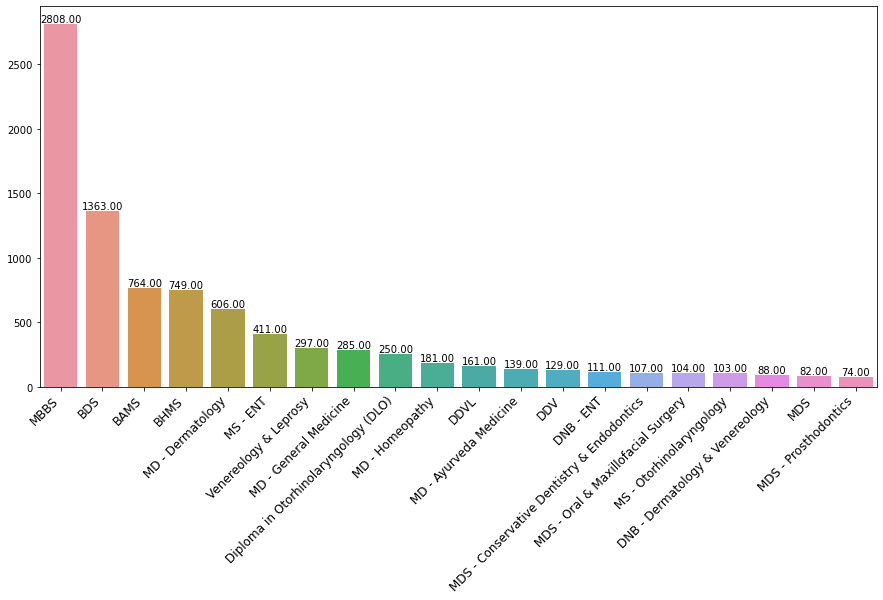

In [62]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=top_20qual, y=top_20qual_val)
ax.set_xticklabels(top_20qual, rotation=45, ha="right",fontsize=12)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

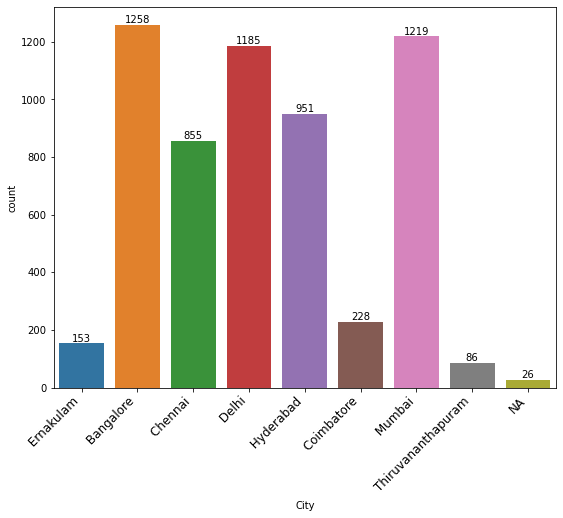

In [63]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x=df_train['City'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=12)
for p in ax.patches:
        ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Most data was collected from cities - 'Banglore', 'Mumbai' and 'Delhi'

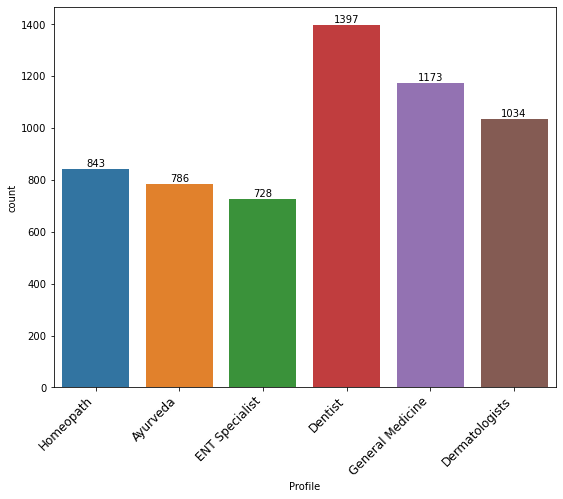

In [64]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x=df_train['Profile'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=12)
for p in ax.patches:
        ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* There are many Dentists than Doctors of other specializations

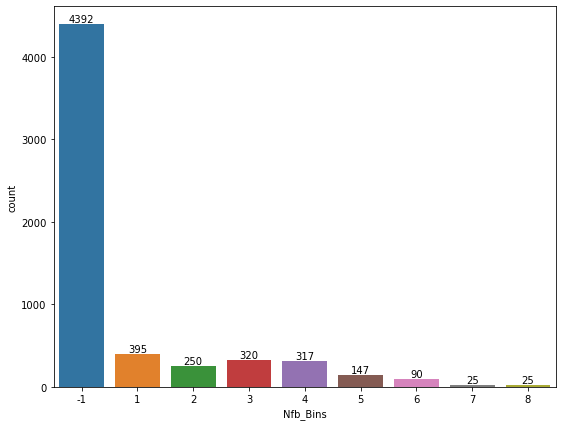

In [65]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x=df_train['Nfb_Bins'])
for p in ax.patches:
        ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

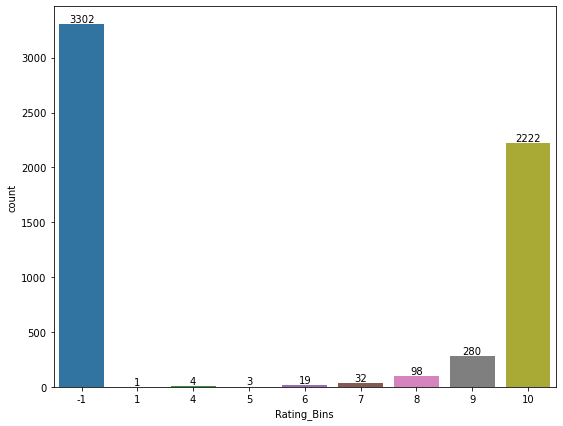

In [66]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x=df_train['Rating_Bins'])
for p in ax.patches:
        ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Rating_Bins & Nfb_Bins have too many null values( in category -1)
* We can drop them if they are not useful after bivariate analysis

Text(0.5, 0, 'Experience')

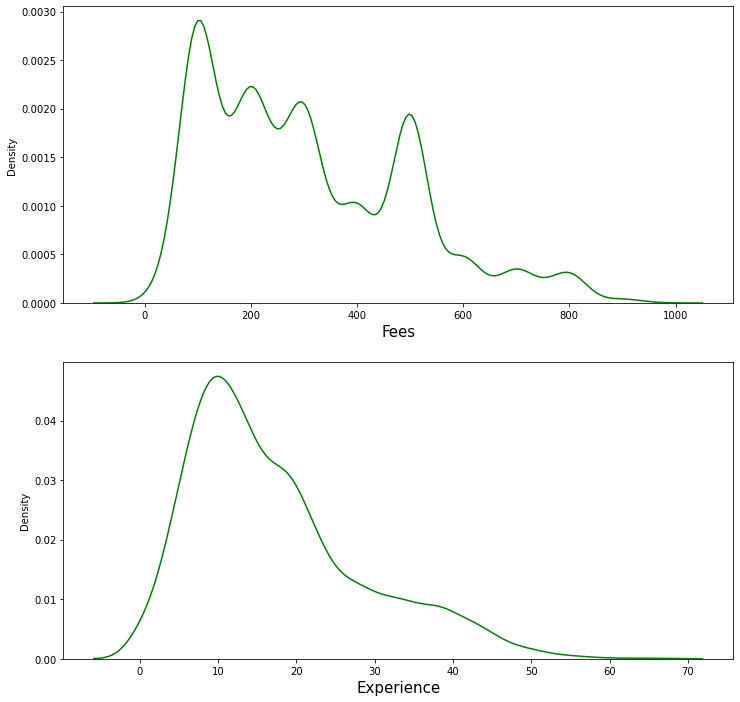

In [67]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
ax = sns.distplot(df_train['Fees'], hist = False, color = "green")
ax.set_xlabel('Fees',fontsize=15)
plt.subplot(2,1,2)
ax = sns.distplot(df_train['Experience'], hist = False, color = "green")
ax.set_xlabel('Experience',fontsize=15)

* 'Fees' column is multimodal and is slightly right skewed
* 'Experience' column is slightly right skewed

Text(0.5, 0, 'Experience')

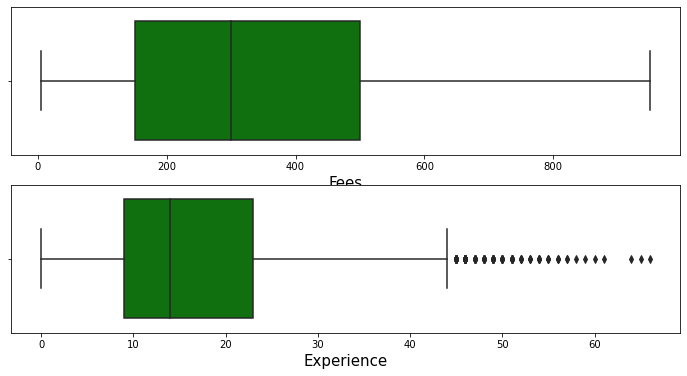

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
ax = sns.boxplot(df_train['Fees'], orient='h', color = "green")
ax.set_xlabel('Fees',fontsize=15)
plt.subplot(2,1,2)
ax = sns.boxplot(df_train['Experience'], orient='h', color = "green")
ax.set_xlabel('Experience',fontsize=15)

* There are no outliers in the 'Fees' Column
* There are some outliers in the 'Experience' column

In [69]:
temp_df = df_train[['Fees', 'Experience']]
threshold = 3

In [70]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
        1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
        2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
        3942, 3960, 4040, 4167, 4212, 4257, 4344, 4581, 4730, 4763, 4775,
        4835, 5195, 5250, 5265, 5277, 5311, 5410, 5422, 5587, 5637, 5664,
        5720, 5807, 5942], dtype=int64),
 array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [71]:
df_new = df_train[(z<threshold).all(axis=1)]
df_new

,Experience,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Nfb_Bins,Rating_Bins
0,24,Homeopath,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Ernakulam,3,10
1,12,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore,5,10
2,9,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bangalore,-1,-1
3,12,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1,-1
4,20,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,4,10
5957,33,General Medicine,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1,-1
5958,41,General Medicine,600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,3,10
5959,15,General Medicine,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,-1,9


In [72]:
#Percentage of data lost
((len(df_train)-len(df_new))/len(df_train))*100

0.9729911088743499

##### Less than 1% of data is lost which is lesser than the threshold (5%) hence we can proceed with z score method

### BIVARIATE ANALYSIS

#### FEES VS OTHER VARIABLES

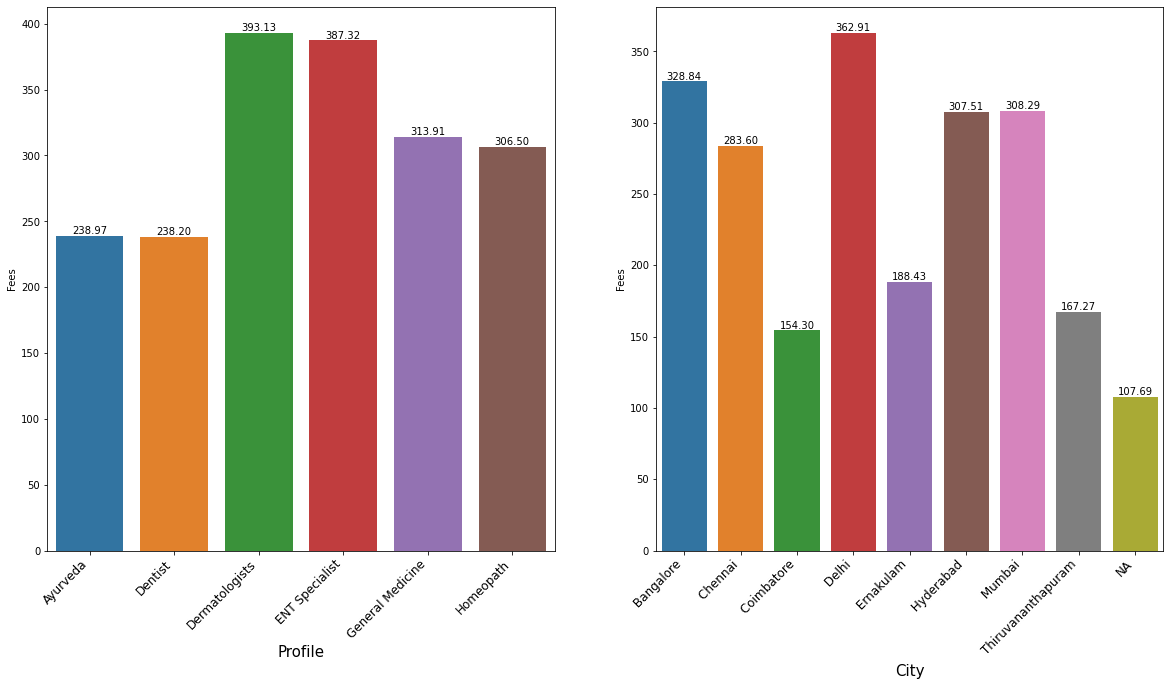

In [73]:
plt.figure(figsize=(20,10))
cols = ['Profile','City']
for i in range(len(cols)):
    df_grp = df_train[['Fees',cols[i]]].groupby(cols[i]).mean()
    plt.subplot(1,2,i+1)
    ax = sns.barplot(x=df_grp.index, y=df_grp['Fees'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=12)
    ax.set_xlabel(cols[i],fontsize=15)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Dermatologists and ENT specialists charge higher fees
* The average fees is higher in Delhi than in other cities

In [74]:
df_train

,Experience,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Nfb_Bins,Rating_Bins
0,24,Homeopath,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Ernakulam,3,10
1,12,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore,5,10
2,9,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bangalore,-1,-1
3,12,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1,-1
4,20,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,4,10
5957,33,General Medicine,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1,-1
5958,41,General Medicine,600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,3,10
5959,15,General Medicine,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,-1,9


In [75]:
top20_fees_mean = []
for i in range(len(top_20qual)):
    df_grp = df_train[['Fees',top_20qual[i]]].groupby(top_20qual[i]).mean()
    top20_fees_mean.append(df_grp.loc[1,'Fees'])
top20_fees_mean

[362.8288770053476,
 238.26358296622612,
 238.18766404199476,
 306.7232620320856,
 400.9917355371901,
 398.02919708029196,
 402.901023890785,
 342.8070175438597,
 318.5140562248996,
 327.7049180327869,
 390.0621118012422,
 284.9640287769784,
 396.5034965034965,
 406.1818181818182,
 278.0373831775701,
 294.71153846153845,
 410.19417475728153,
 433.52272727272725,
 264.67105263157896,
 276.35135135135135]

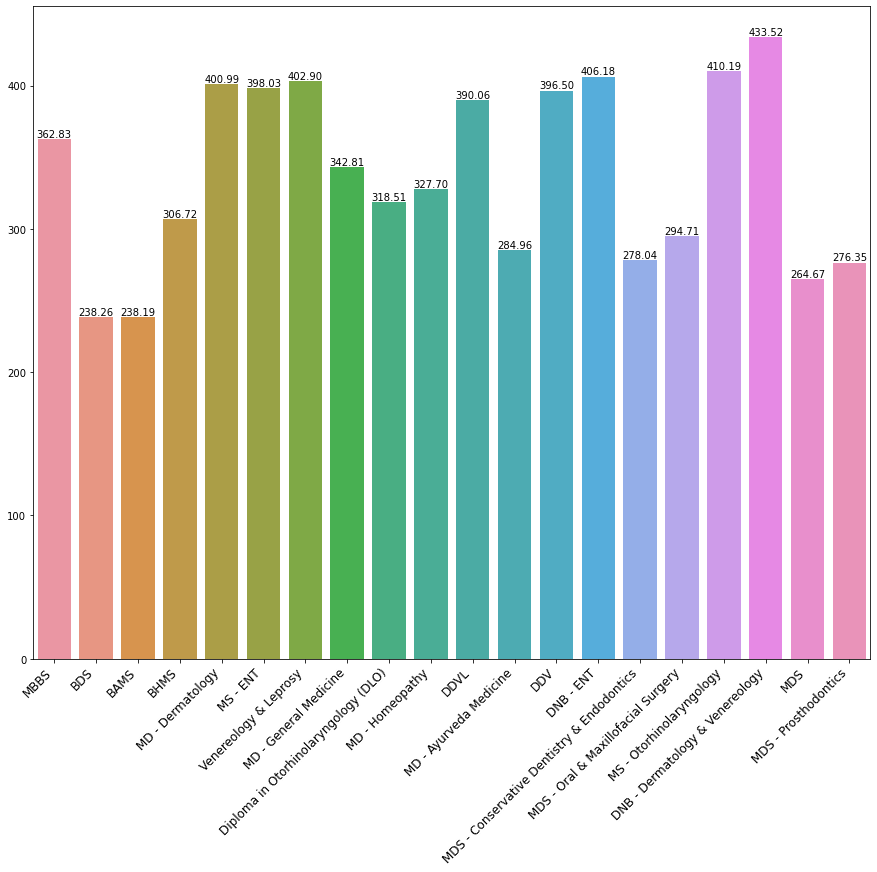

In [76]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x=top_20qual, y=top20_fees_mean)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
#     ax.set_xlabel(cols[i],fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Doctors who have studied DNB - Dermatology & Venereology charge fees higher than the others

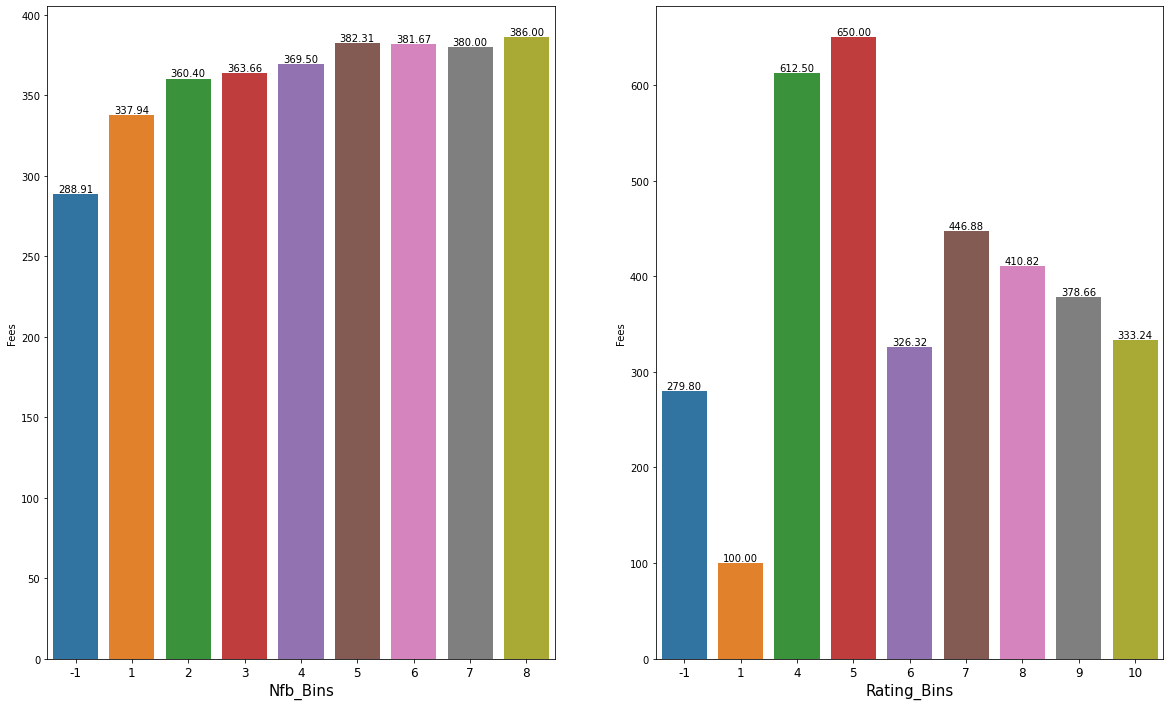

In [77]:
plt.figure(figsize=(20,12))
cols = ['Nfb_Bins', 'Rating_Bins']
for i in range(len(cols)):
    df_grp = df_train[['Fees',cols[i]]].groupby(cols[i]).mean()
    plt.subplot(1,2,i+1)
    ax = sns.barplot(x=df_grp.index, y=df_grp['Fees'])
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_xlabel(cols[i],fontsize=15)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* As the ratings go higher average fees goes down - people tend to give higher ratings to doctors whoc collect lower fees
* Number of feedbacks doesn't have much of an impact on fees

<AxesSubplot:xlabel='Experience', ylabel='Fees'>

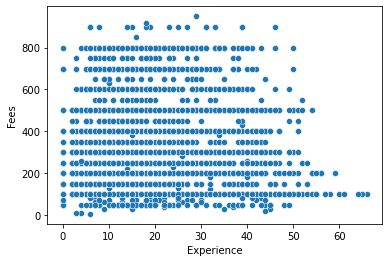

In [78]:
sns.scatterplot(x=df_train['Experience'], y=df_train['Fees'])

Experience and Fees do not have a meaningful relation

#### RATING VS OTHER VARIBLES

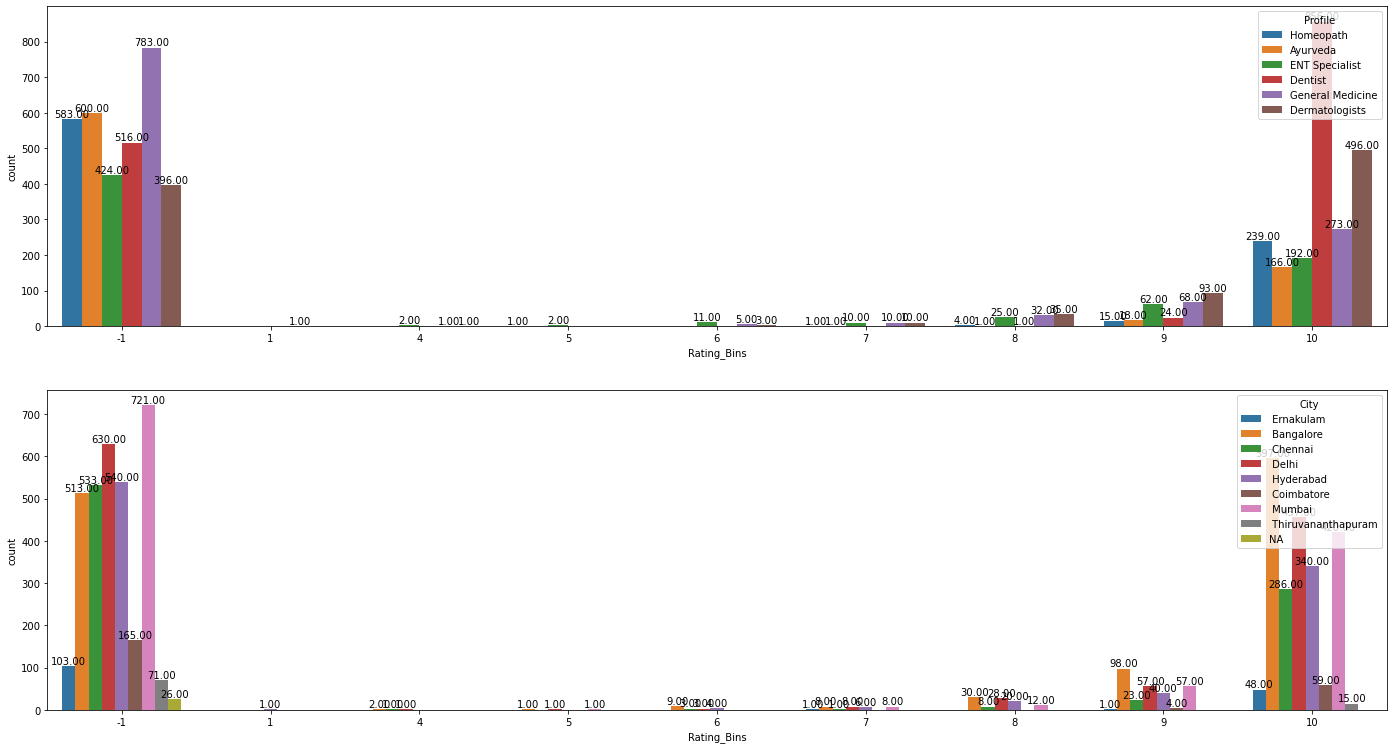

In [79]:
plt.figure(figsize=(24,20))
cols = ['Profile','City']
for i in range(len(cols)):
    plt.subplot(3,1,i+1)
    ax = sns.countplot(x=df_train['Rating_Bins'], hue=df_train[cols[i]])
    for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Dentists get higher ratinng than other specialists
* Doctors in Banglore recieved higher rating than those in other cities
* Doctors who studied MBBS recieved higher rating than others

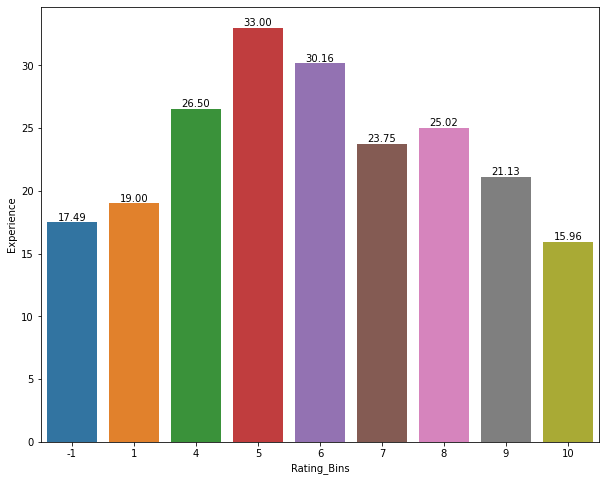

In [80]:
plt.figure(figsize=(10,8))
df_grp = df_train[['Experience','Rating_Bins']].groupby('Rating_Bins').mean()
ax = sns.barplot(x=df_grp.index, y=df_grp['Experience'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

Doctors with highest rating have 15 years of Experience on an average

#### EXPERIENCE VS PROFILE

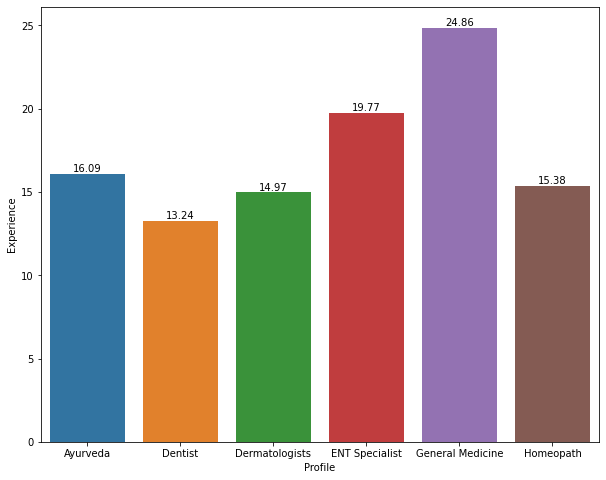

In [81]:
plt.figure(figsize=(10,8))
df_grp = df_train[['Experience','Profile']].groupby('Profile').mean()
ax = sns.barplot(x=df_grp.index, y=df_grp['Experience'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Dentists are comparatively less experienced than other specialists
* General Medicine doctors are more experienced than other specialists

##### We can drop the Nfb_Bins column since it does not vary much with the Fees column

In [82]:
df_train.drop('Nfb_Bins',axis=1,inplace=True)
df_test.drop('Nfb_Bins',axis=1,inplace=True)

In [83]:
df_train

,Experience,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Rating_Bins
0,24,Homeopath,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Ernakulam,10
1,12,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Bangalore,10
2,9,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bangalore,-1
3,12,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1
4,20,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,10
5957,33,General Medicine,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1
5958,41,General Medicine,600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,10
5959,15,General Medicine,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,9


In [84]:
df_test

,Experience,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Rating_Bins
0,35,General Medicine,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,-1
1,31,ENT Specialist,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Hyderabad,-1
2,40,Dermatologists,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,Chennai,7
3,0,Ayurveda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi,-1
4,16,Dentist,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bangalore,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,Ayurveda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,-1
1983,4,Dermatologists,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1
1984,9,General Medicine,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chennai,-1
1985,12,Dentist,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bangalore,10


### LABEL ENCODING

In [85]:
from sklearn.preprocessing import LabelEncoder
cols = ['Profile','City']
label_encoder = LabelEncoder()
for i in range(len(cols)):
    df_train[cols[i]] = label_encoder.fit_transform(df_train[cols[i]])
    df_test[cols[i]] = label_encoder.fit_transform(df_test[cols[i]])
df_train

,Experience,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Rating_Bins
0,24,5,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,10
1,12,0,350,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10
2,9,3,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1
3,12,0,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
4,20,0,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,3,300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
5957,33,4,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1
5958,41,4,600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10
5959,15,4,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,9


In [86]:
df_test

,Experience,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Rating_Bins
0,35,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,-1
1,31,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,-1
2,40,2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,7
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-1
4,16,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
1983,4,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1
1984,9,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1
1985,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


### CORRELATION

<AxesSubplot:>

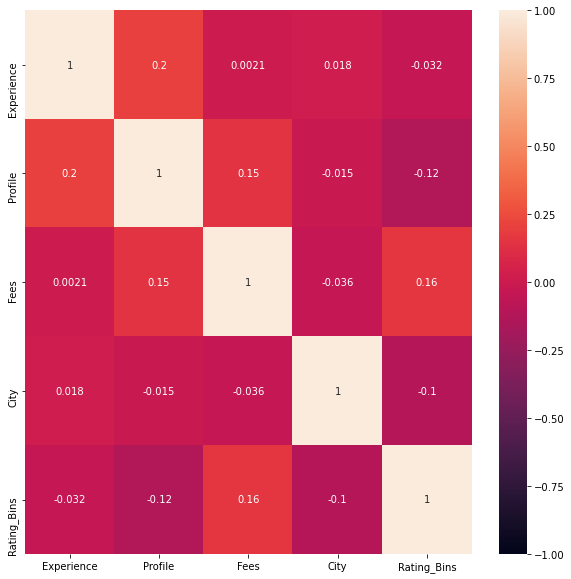

In [87]:
plt.figure(figsize=(10,10))
df_corr = df_train.drop(top_20qual,axis=1)
sns.heatmap(df_corr.corr(), vmax=1, vmin=-1, annot=True)

* Fees column is positively correlated with all the columns

In [88]:
x = df_train.drop(['Fees'],axis=1)
y = df_train['Fees']
test_x = df_test.copy()

#### SKEWNESS

In [89]:
df_train['Experience'].skew()

0.9910893264106609

In [90]:
test_x['Experience'].skew()

0.9634465703183951

* Skewness value of Experience column is more than the threshold

In [91]:
from sklearn.preprocessing import power_transform
transf = pd.DataFrame(power_transform(x[['Experience']],method='yeo-johnson'))
transf1 = pd.DataFrame(power_transform(test_x[['Experience']],method='yeo-johnson'))
transf.rename({0: 'Experience'}, axis=1, inplace = True)
transf1.rename({0: 'Experience'}, axis=1, inplace = True)
x.drop('Experience', axis=1 ,inplace=True)
test_x.drop('Experience', axis=1 ,inplace=True)
x = pd.concat((x, transf), axis=1)
test_x = pd.concat((test_x, transf1), axis=1)

#### Since all the other predictor variables are categorical we don't need to check for skewness

### MODEL BUILDING

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
models = {
    "Linear Regression" : {'model':LinearRegression(),
                           'params':{}
                          }, 
    "Ridge" : {'model':Ridge(),
               'params':{'alpha':[1,2,10,200, 250, 275, 300, 500]}
              }, 
    "Decision Tree" : {'model':DecisionTreeRegressor(),
                       'params':{'max_depth' : [5, 8, 50, 100],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestRegressor(),
                       'params':{'n_estimators':[100,150],
                                 'max_depth':[5,8,50,100,150,200], 
                                 'min_samples_leaf':[1,2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsRegressor(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan']
                                      }
                            }
}

In [93]:
min_scr = 100000

for r_s in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        rmse = np.sqrt(mean_squared_error(pred_test,y_test))
        if rmse < min_scr:
            min_scr = rmse
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",min_scr)
print("Random State : ",r_s)

Model :  Ridge()
Score :  170.42574593938892
Random State :  99


#### RIDGE REGRESSION HAS THE LEAST RMSE SCORE OF 170.4

In [94]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=999,test_size=0.20)
grid = GridSearchCV(models['Ridge']['model'], models['Ridge']['params'], cv=4, scoring = 'neg_root_mean_squared_error')
grid.fit(x_train,y_train)
print({
    'model': 'Ridge',
    'best_score' : np.abs(grid.best_score_),
    'best_params' : grid.best_params_
})

{'model': 'Ridge', 'best_score': 178.3560493960561, 'best_params': {'alpha': 200}}


In [95]:
def rmsle(y,y_pred):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
print('RMSLE Score : ',rmsle(y_test,y_pred))
print('R2 Score : ',r2_score(y_test,y_pred))
print('RMSE Score : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MSE Score : ',mean_squared_error(y_test,y_pred))
print('RMAE Score : ',np.sqrt(mean_absolute_error(y_test,y_pred)))

RMSLE Score :  0.782448859310322
R2 Score :  0.1281017119222464
RMSE Score :  176.58764000795452
MSE Score :  31183.194603578944
RMAE Score :  11.857579155427565


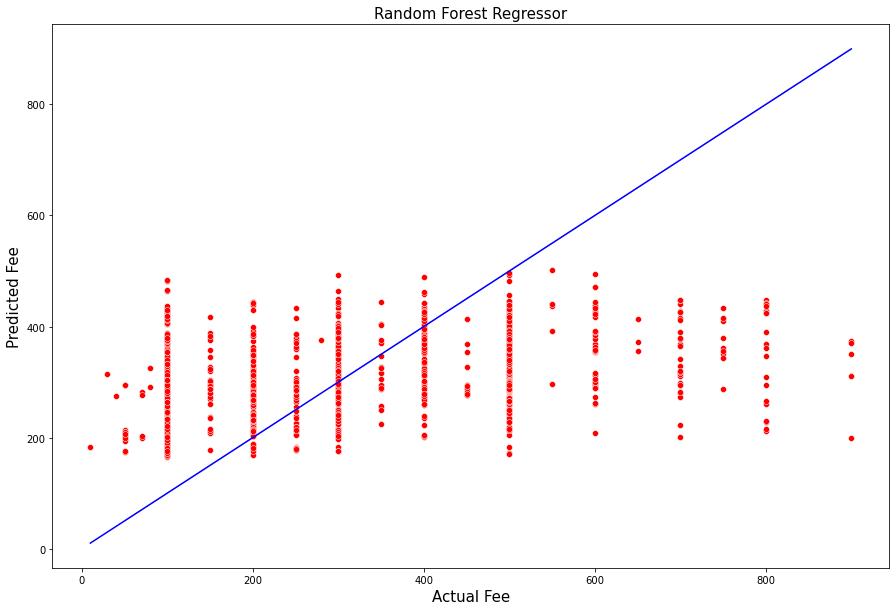

In [97]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(y_test,y_pred,color='r')
ax = sns.lineplot(y_test,y_test,color='b')
ax.set_xlabel('Actual Fee',fontsize=15)
ax.set_ylabel('Predicted Fee',fontsize=15)
ax.set_title('Random Forest Regressor',fontsize=15)
plt.show()

In [98]:
y_pred = ridge.predict(test_x)

df_test['Predicted'] = y_pred
df_test

,Experience,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,DNB - Dermatology & Venereology,MDS,MDS - Prosthodontics,City,Rating_Bins,Predicted
0,35,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,-1,237.160340
1,31,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,-1,242.449626
2,40,2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,7,515.102301
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-1,263.473141
4,16,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,10,566.102194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,260.806563
1983,4,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,305.710528
1984,9,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,264.737578
1985,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,555.793192


In [99]:
df_test.to_csv("Doctor_Fees_predicted.csv", index=False)

In [101]:
import joblib
joblib.dump(ridge,"Doctor_Fees_Ridge.pkl")

['Doctor_Fees_Ridge.pkl']